# Image Augmentation
* Rain Simulation
* Fog Simulation

In [396]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import cv2

In [397]:
img1 = np.array(Image.open('sample.png'))
img2 = np.array(Image.open('sample2.png'))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGRA2BGR) # convert 4 channels to 3 channels

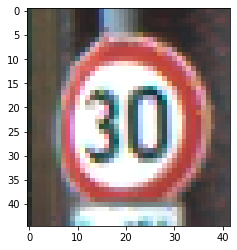

In [398]:
plt.imshow(np.array(img1))

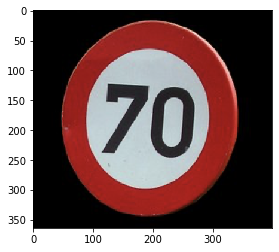

In [399]:
plt.imshow(np.array(img2))

### Shadow

In [401]:
def generate_shadow_coordinates(imshape, no_of_shadows=1):    
    vertices_list=[]    
    for index in range(no_of_shadows):        
        vertex=[]        
        for dimensions in range(np.random.randint(3, 15)): 
            ## Dimensionality of the shadow polygon            
            vertex.append(( imshape[1]*np.random.uniform(),imshape[0]//3+imshape[0]*np.random.uniform()))        
            vertices = np.array([vertex], dtype=np.int32) ## single shadow vertices         
            vertices_list.append(vertices)   
    return vertices_list ## List of shadow vertices
        
def add_shadow(image,no_of_shadows=1):    
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
    mask = np.zeros_like(image)     
    imshape = image.shape    
    vertices_list= generate_shadow_coordinates(imshape, no_of_shadows) #3 getting list of shadow vertices    
    for vertices in vertices_list:         
        cv2.fillPoly(mask, vertices, 255) ## adding all shadow polygons on empty mask, single 255 denotes only red channel        
        image_HLS[:,:,1][mask[:,:,0]==255] = image_HLS[:,:,1][mask[:,:,0]==255]*0.5   ## if red channel is hot, image's "Lightness" channel's brightness is lowered     
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB

In [292]:
new_img = add_shadow(img, no_of_shadows=20)

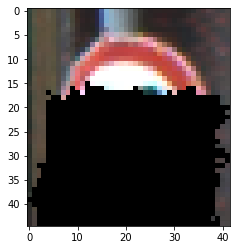

In [293]:
plt.imshow(new_img)

### Rain

In [402]:
def generate_random_lines(imshape,slant,drop_length,n_drops):    
    drops=[]    
    for i in range(n_drops): ## If You want heavy rain, try increasing this        
        if slant<0:            
            x= np.random.randint(slant,imshape[1])        
        else:            
            x= np.random.randint(0,imshape[1]-slant)        
            y= np.random.randint(0,imshape[0]-drop_length)        
            drops.append((x,y))    
    return drops            
    
def add_rain(image, drop_length, drop_width, n_drops):  
    # copy image to prevent original image overwrite
    new_img = image.copy()
    
    # rain drops setting
    slant_extreme = 8
    slant= np.random.randint(1,slant_extreme)  
    drop_color=(240,240,240) ## a shade of light gray    
    imshape = new_img.shape 
    rain_drops= generate_random_lines(imshape,slant,drop_length, n_drops)
    
    # add rain drops to image 
    for rain_drop in rain_drops: 
        new_img = cv2.line(new_img,(rain_drop[0],rain_drop[1]),(rain_drop[0]+slant,rain_drop[1]+drop_length),drop_color,drop_width)
    new_img = cv2.blur(new_img,(2,1)) # blur image 
    new_img = np.floor(new_img*0.5) # bring down image brightness 
    new_img = new_img.astype(int) # convert image back into int format
    return new_img

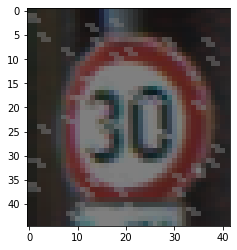

In [403]:
new_img = add_rain(image = img1, drop_length = 1, drop_width = 1, n_drops = 50)
plt.imshow(new_img)

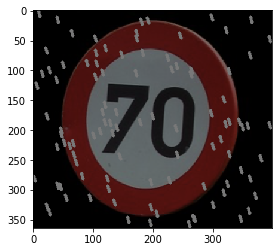

In [404]:
new_img = add_rain(image = img2, drop_length = 10, drop_width = 3, n_drops = 100)
plt.imshow(new_img)

### Foggy

In [ ]:
def add_blur(image, x,y,hw):    
    image[y:y+hw, x:x+hw,1] = image[y:y+hw, x:x+hw,1]+1    
    image[:,:,1][image[:,:,1]>255]  = 255  ##Sets all values above 255 to 255    
    image[y:y+hw, x:x+hw,1] = cv2.blur(image[y:y+hw, x:x+hw,1] ,(10,10))    
    return image

In [ ]:
def generate_random_blur_coordinates(imshape,hw):    
    blur_points=[]    
    midx= imshape[1]//2-hw-100    
    midy= imshape[0]//2-hw-100    
    index=1    
    while(midx>-100 or midy>-100): 
        ## radially generating coordinates        
        for i in range(250*index):            
            x= np.random.randint(midx,imshape[1]-midx-hw)            
            y= np.random.randint(midy,imshape[0]-midy-hw)            
            blur_points.append((x,y))        
            midx-=250*imshape[1]//sum(imshape)        
            midy-=250*imshape[0]//sum(imshape)        
            index+=1    
    return blur_points    

def add_fog(image):    
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
    mask = np.zeros_like(image)     
    imshape = image.shape    
    hw=100    
    image_HLS[:,:,1]=image_HLS[:,:,1]*0.8    
    haze_list= generate_random_blur_coordinates(imshape,hw)    
    for haze_points in haze_list:         
        image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255        
        image_HLS= add_blur(image_HLS, haze_points[0],haze_points[1], hw) ## adding all shadow polygons on empty mask, single 255 denotes only red channel    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB